# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

## Set up Environment

In [1]:
# Install Spark 3.5.0
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz

In [2]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [3]:
# Install findspark
!python -m pip install -q findspark

import findspark
findspark.init()

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
from pyspark.sql import SparkSession

APP_NAME = "Final"

spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

spark

In [6]:
pip install matplotlib seaborn

## Load the data and show schema

In [7]:
# Load the dataset
df = spark.read.csv("/content/gdrive/MyDrive/Colab Datasets/names_by_birth_year.csv", header=True, inferSchema=True)

# Show schema and some sample data
df.printSchema()
df.show(5)

root
 |-- Year: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Count: integer (nullable = true)

+----+---------+------+-----+
|Year|     Name|Gender|Count|
+----+---------+------+-----+
|1883|     Mary|     F| 8012|
|1883|     Anna|     F| 3306|
|1883|     Emma|     F| 2367|
|1883|Elizabeth|     F| 2255|
|1883|   Minnie|     F| 2035|
+----+---------+------+-----+
only showing top 5 rows



## Histogram of Birth Year and Name Counts

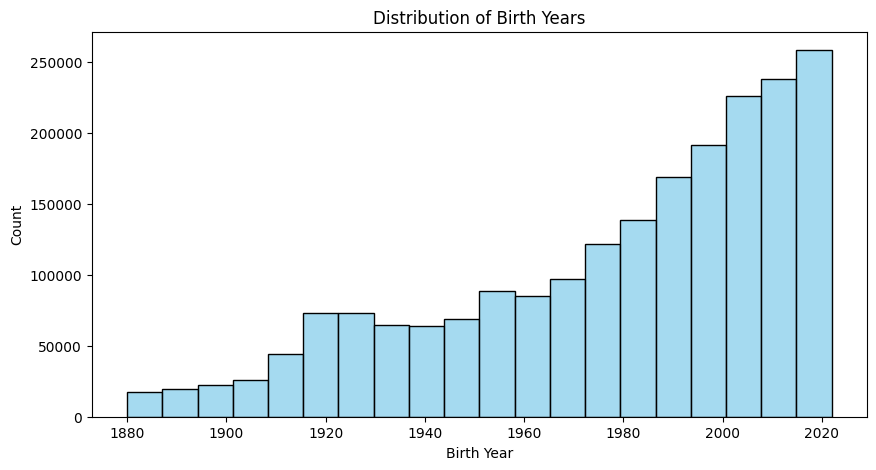

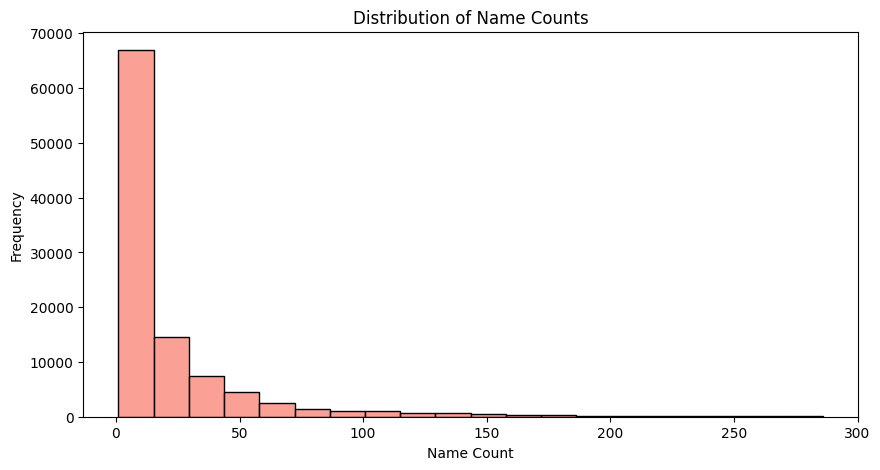

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import count

# Create a histogram for the "Year" column
plt.figure(figsize=(10, 5))
sns.histplot(df.select("Year").rdd.flatMap(lambda x: x).collect(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Birth Years")
plt.xlabel("Birth Year")
plt.ylabel("Count")
plt.show()

# Group by unique names and count occurrences
name_counts = df.groupBy("Name").agg(count("Name").alias("NameCount"))

# Create a histogram for the count of unique names
plt.figure(figsize=(10, 5))
sns.histplot(name_counts.select("NameCount").rdd.flatMap(lambda x: x).collect(), bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Name Counts")
plt.xlabel("Name Count")
plt.ylabel("Frequency")
plt.show()

## Explanation of Relevant Features:
1. Year: The birth year of individuals, indicating the time frame for the dataset. This feature is crucial for analyzing naming trends over different periods.

2. Name: The name of individuals, providing insights into the diversity and popularity of names over the years. This feature is central to identifying trends and patterns in naming conventions.

3. Gender: Specifies the gender associated with each name. This information allows for gender-specific analysis and can be used to identify naming preferences based on gender.

4. Count: Represents the frequency or count of a specific name in a given year. This feature is vital for understanding the popularity of names at different points in time.

## Use built-in fucntion to find range of values

In [9]:
# Show the range of values for each column using DataFrame methods
df.agg({"Year": "min", "Year": "max"}).show()
df.agg({"Name": "min", "Name": "max"}).show()
df.select("Gender").distinct().show()
df.agg({"Count": "min", "Count": "max"}).show()

+---------+
|max(Year)|
+---------+
|     2022|
+---------+

+---------+
|max(Name)|
+---------+
|    Zzyzx|
+---------+

+------+
|Gender|
+------+
|     F|
|     M|
+------+

+----------+
|max(Count)|
+----------+
|     99693|
+----------+



## Most Common Words/N-grams:

In [10]:
from pyspark.sql.functions import explode, lower, split

# Tokenize the "Name" column and convert to lowercase
df = df.withColumn("NameTokens", explode(split(lower("Name"), " ")))

# Group by tokens and count occurrences
most_common_words = df.groupBy("NameTokens").count().orderBy("count", ascending=False).limit(10)

print("Most Common Words:")
most_common_words.show()

Most Common Words:
+----------+-----+
|NameTokens|count|
+----------+-----+
|    joseph|  286|
|   francis|  286|
|   william|  286|
|    marion|  286|
|   johnnie|  286|
|      jean|  286|
|    sidney|  286|
|      john|  286|
|    tommie|  286|
|     ollie|  286|
+----------+-----+



# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## Handiling missing values

### Explanation
Dropping rows with null values is necessary to ensure data quality and prevent issues during analysis.
If a row has missing values in critical columns, it may not provide meaningful insights, and imputation
might introduce bias. The count comparison helps us understand the impact of this operation.


In [11]:
# Count of rows before dropping null values
before_rows = df.count()

# Drop rows with null values in any column
df_cleaned = df.dropna()

# Count of rows after dropping null values
after_rows = df_cleaned.count()

print(f"Rows before cleaning: {before_rows}")
print(f"Rows after cleaning: {after_rows}")

Rows before cleaning: 2085158
Rows after cleaning: 2085158


## Handling data types

In [12]:
from pyspark.sql.functions import col

# Casting the "Year" column to integer
df_cleaned = df_cleaned.withColumn("Year", col("Year").cast("integer"))

## Cleaning text data (Convert to lowercase, remove punctuation)

In [13]:
from pyspark.sql.functions import regexp_replace

# Convert "Name" column to lowercase
df_cleaned = df_cleaned.withColumn("Name", lower(col("Name")))

# Remove punctuation marks from the "Name" column
df_cleaned = df_cleaned.withColumn("Name", regexp_replace(col("Name"), "[^a-zA-Z0-9\\s]", ""))

## Handling bad values/data

In [14]:
# Remove rows where "Year" is negative
df_cleaned = df_cleaned.filter(col("Year") >= 0)

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

## Adding a new column with UDF

### Explanation
Adding a new column "FirstLetter" can provide insights or features for analysis.
A simple UDF is used to extract the first letter of the "Name" column,
which might be useful for exploring patterns or trends related to initial letters of names.

In [15]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Example UDF to extract the first letter of the "Name" column
@udf(StringType())
def extract_first_letter(name):
    return name[0] if name else None

# Adding a new column "FirstLetter" with the first letter of the name
df_transformed = df_cleaned.withColumn("FirstLetter", extract_first_letter("Name"))

## Splitting data into train/test sets

### Explanation
Splitting the data into train and test sets is essential for model evaluation.
The training set is used to train the model, and the test set helps assess its performance on unseen data.

In [16]:
train_data, test_data = df_cleaned.randomSplit([0.7, 0.3], seed=42)

## Creating vectors for relevant features

### Explanation
Creating vectors is a common step in machine learning.
The VectorAssembler combines multiple feature columns into a single vector column,
which is often required for machine learning algorithms in Spark.

In [17]:
from pyspark.ml.feature import VectorAssembler

# Assuming "Year" and "Count" are relevant numeric features
assembler = VectorAssembler(inputCols=["Year", "Count"], outputCol="features")
df_transformed = assembler.transform(df_cleaned)

## One-Hot encoding categorical variables

### Explanation
One-hot encoding is necessary for categorical variables in machine learning models.
This process converts categorical variables into a format suitable for machine learning algorithms,
where each category is represented as a binary (0 or 1) column.

In [18]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Assuming "Gender" is a categorical variable
gender_indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
gender_encoder = OneHotEncoder(inputCol="GenderIndex", outputCol="GenderEncoded")

# Create a pipeline to execute the stages in order
pipeline = Pipeline(stages=[gender_indexer, gender_encoder])

# Fit and transform the data using the pipeline
pipeline_model = pipeline.fit(df_cleaned)
df_transformed = pipeline_model.transform(df_cleaned)

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


## Exploratory Data Analysis (EDA)

## Fit the data into the model

### Fit a linear regression model to predict the count based on the year

In [19]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Vectorize features
assembler = VectorAssembler(inputCols=["Year"], outputCol="features")
df_model = assembler.transform(df_cleaned)

# Split the data into training and testing sets
train_data, test_data = df_model.randomSplit([0.8, 0.2], seed=42)

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Count")

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Evaluate the model on the test data
test_results = lr_model.evaluate(test_data)

# Display the model's coefficients and performance metrics
print("Coefficients: ", lr_model.coefficients)
print("Intercept: ", lr_model.intercept)
print("Root Mean Squared Error (RMSE): ", test_results.rootMeanSquaredError)

Coefficients:  [-1.152314044820943]
Intercept:  2454.7341521463686
Root Mean Squared Error (RMSE):  1465.0440206822977


### Regression Analysis

Use linear regression to predict the count of names based on the birth year.

In [20]:
# Fit the linear regression model
lr_model = LinearRegression(featuresCol="features", labelCol="Count").fit(df_model)

# Print the coefficients and intercept
print("Coefficients: ", lr_model.coefficients)
print("Intercept: ", lr_model.intercept)

Coefficients:  [-1.1495452993479458]
Intercept:  2449.352935200019


### SQL query to filter result

In [21]:
# Register the DataFrame as a SQL temporary view
df_cleaned.createOrReplaceTempView("name_data")

# Use SQL to filter results for "Female" gender
female_data = spark.sql("SELECT * FROM name_data WHERE Gender = 'Female'")